### Clustering

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/jiangzhanyuan/Desktop/second year/IEOR242A/Final Project/Listing_Honululu.csv")
df.head()


,id,is_entire_condo,is_entire_rental_unit,is_entire_home,is_room_in_hotel,is_entire_serviced_apartment,is_entire_townhouse,room_type,accommodates,beds,...,review_scores_cleanliness_missing,review_scores_location_missing,review_scores_communication_missing,host_response_rate_missing,host_acceptance_rate_missing,reviews_per_month_missing,drive_dist_hnl_km,drive_time_hnl_min,drive_dist_wk_km,drive_time_wk_min
0,18465,False,True,False,False,False,False,Entire home/apt,4.0,2.0,...,0,0,0,0,0,0,27.6,33.8,3.2,10.4
1,18466,False,True,False,False,False,False,Entire home/apt,4.0,1.0,...,0,0,0,0,0,0,26.7,35.8,3.0,9.9
2,20562,True,False,False,False,False,False,Entire home/apt,4.0,2.0,...,0,0,0,0,0,0,26.0,35.3,2.3,9.5
3,37099,False,True,False,False,False,False,Entire home/apt,2.0,1.0,...,0,0,0,0,0,0,27.7,33.9,3.9,11.7
4,38634,False,False,False,True,False,False,Private room,2.0,4.0,...,0,0,0,0,0,0,23.7,36.4,0.9,4.8


In [3]:
features_for_clustering = [
     "latitude",
     "longitude",
     "drive_dist_hnl_km",   # distance to HNL
     "drive_dist_wk_km",    # distance to Waikiki
     #"drive_time_hnl_min",
     #"drive_time_wk_min",
     "review_scores_rating",
     "review_scores_cleanliness",
    # "review_scores_location",
    # "reviews_per_month",
     "accommodates",
     "bedrooms",
     "bathrooms",
     #"host_listings_count"
    #"host_years"
    #"price"



    # "accommodates",
    # "beds",
    # "bedrooms",
    # "bathrooms",
    # "host_years",
    # "host_listings_count",
    # "calculated_host_listings_count",
    # "calculated_host_listings_count_entire_homes",
    # "host_response_rate",
    # "host_acceptance_rate",
    # "availability_365",
    # "availability_30",
    # "minimum_nights",
    # "maximum_nights",
    # "minimum_nights_avg_ntm",
    # "maximum_nights_avg_ntm",
    # "number_of_reviews",
    # "number_of_reviews_ltm",
    # "number_of_reviews_l30d",
    # "reviews_per_month",
    # "review_scores_rating",
    # "review_scores_cleanliness",
    # "review_scores_location",
    # "review_scores_communication",
    # "drive_dist_hnl_km",
    # "drive_time_hnl_min",
    # "drive_dist_wk_km",
    # "drive_time_wk_min",
    # "latitude",
    # "longitude",

]

clust_df = df[features_for_clustering].copy()
clust_df.describe()


,latitude,longitude,drive_dist_hnl_km,drive_dist_wk_km,review_scores_rating,review_scores_cleanliness,accommodates,bedrooms,bathrooms
count,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000
mean,21.334014,-157.877902,32.019816,15.024450,3.877774,3.849008,4.387786,1.330771,1.420564
std,0.111300,0.115211,12.396797,21.832804,1.869377,1.859851,2.518094,1.429058,0.885211
min,21.256180,-158.230370,12.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.278431,-157.852863,24.400000,1.500000,4.360000,4.260000,2.000000,1.000000,1.000000
50%,21.284870,-157.832318,26.400000,2.900000,4.780000,4.750000,4.000000,1.000000,1.000000
75%,21.331557,-157.823200,37.175000,24.400000,4.950000,4.930000,6.000000,2.000000,2.000000
max,21.705690,-157.666920,74.100000,73.500000,5.000000,5.000000,16.000000,48.000000,13.000000


In [4]:
extra_features = [
    #"has_air_conditioning",
    #"has_gym",
    #"has_pool",

    #"is_room_in_hotel",
    #"is_entire_home"

    #"host_is_superhost"
]

features_for_clustering = features_for_clustering + extra_features
clust_df = df[features_for_clustering].copy()


In [5]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(clust_df)

X_scaled.shape


(9366, 9)

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

sil_scores = {}

for k in range(2, 10):
    model_k = AgglomerativeClustering(
        n_clusters=k,
        linkage="ward"   # affinity/metric is fixed to euclidean for ward
    )
    labels_k = model_k.fit_predict(X_scaled)
    score_k = silhouette_score(X_scaled, labels_k)
    sil_scores[k] = score_k
    print(f"k = {k}, silhouette_score = {score_k:.3f}")



k = 2, silhouette_score = 0.483
k = 3, silhouette_score = 0.524
k = 4, silhouette_score = 0.519
k = 5, silhouette_score = 0.521
k = 6, silhouette_score = 0.465
k = 7, silhouette_score = 0.491
k = 8, silhouette_score = 0.492
k = 9, silhouette_score = 0.494


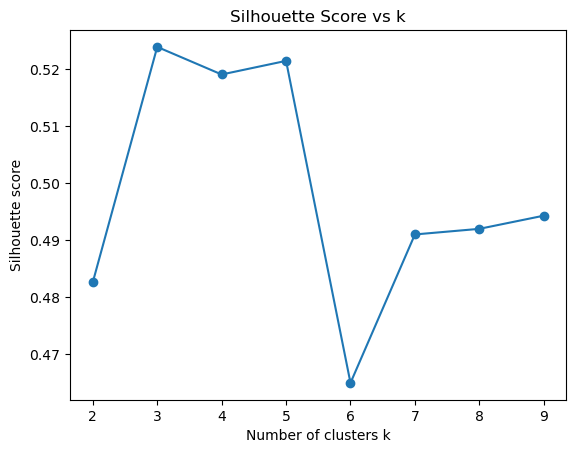

In [7]:
import matplotlib.pyplot as plt

ks = list(sil_scores.keys())
scores = [sil_scores[k] for k in ks]

plt.plot(ks, scores, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette score")
plt.title("Silhouette Score vs k")
plt.show()


In [8]:
# choose k based on the silhouette plot
best_k = 3

cluster_model = AgglomerativeClustering(
    n_clusters=best_k,
    linkage="ward"
)

cluster_labels = cluster_model.fit_predict(X_scaled)

# Attach to original df
df["Cluster_ID"] = cluster_labels
df["Cluster_ID"].value_counts()


Cluster_ID
2    5936
1    2017
0    1413
Name: count, dtype: int64

### K-means robustness check

In [9]:
clust_df.describe()
clust_df.nunique()


latitude                     5457
longitude                    5536
drive_dist_hnl_km             508
drive_dist_wk_km              560
review_scores_rating          132
review_scores_cleanliness     145
accommodates                   16
bedrooms                       16
bathrooms                      23
dtype: int64

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
km_labels = kmeans.fit_predict(X_scaled)

df["Cluster_ID_kmeans"] = km_labels
df[["Cluster_ID", "Cluster_ID_kmeans"]].head()


,Cluster_ID,Cluster_ID_kmeans
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0


In [11]:
clust_df.nunique()



latitude                     5457
longitude                    5536
drive_dist_hnl_km             508
drive_dist_wk_km              560
review_scores_rating          132
review_scores_cleanliness     145
accommodates                   16
bedrooms                       16
bathrooms                      23
dtype: int64

## CLuster Profiling and Interpretation

In [12]:
cluster_profile = df.groupby("Cluster_ID")[features_for_clustering + ["price"]].agg(
    ["mean", "median"]
)

cluster_profile


latitude              longitude             drive_dist_hnl_km  \
                 mean     median        mean      median              mean   
Cluster_ID                                                                   
0           21.307955  21.283151 -157.827183 -157.829303         28.651238   
1           21.485886  21.479570 -158.073018 -158.119880         51.266832   
2           21.288612  21.281810 -157.823677 -157.826670         26.281705   

                  drive_dist_wk_km        review_scores_rating         \
           median             mean median                 mean median   
Cluster_ID                                                              
0            25.8         7.480467    2.4             0.251373   0.00   
1            51.6        53.343332   49.9             3.947903   4.88   
2            25.8         3.799798    2.3             4.717170   4.82   

           review_scores_cleanliness        accommodates         bedrooms  \
                                mean median         mean median      mean   
Cluster_ID                                                                  
0                           0.247162   0.00     5.462137    4.0  2.028309   
1                           3.909822   4.85     5.419931    5.0  1.860188   
2                           4.685724   4.80     3.781334    4.0  0.984838   

                  bathrooms               price         
           median      mean median         mean median  
Cluster_ID                                              
0             1.0  1.878627    1.0  6099.146497  255.0  
1             2.0  1.679722    2.0   393.764998  300.0  
2             1.0  1.223467    1.0   556.687332  153.0


- Cluster 0 is the closest to waikiki
- Cluster 1 has the highest average price

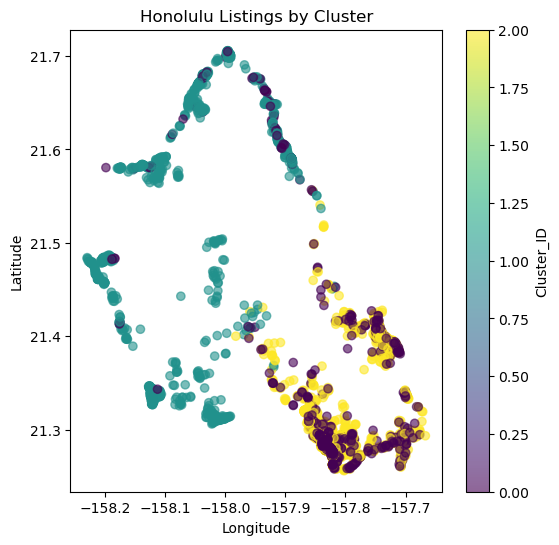

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
scatter = plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["Cluster_ID"],
    alpha=0.6
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Honolulu Listings by Cluster")
plt.colorbar(scatter, label="Cluster_ID")
plt.show()


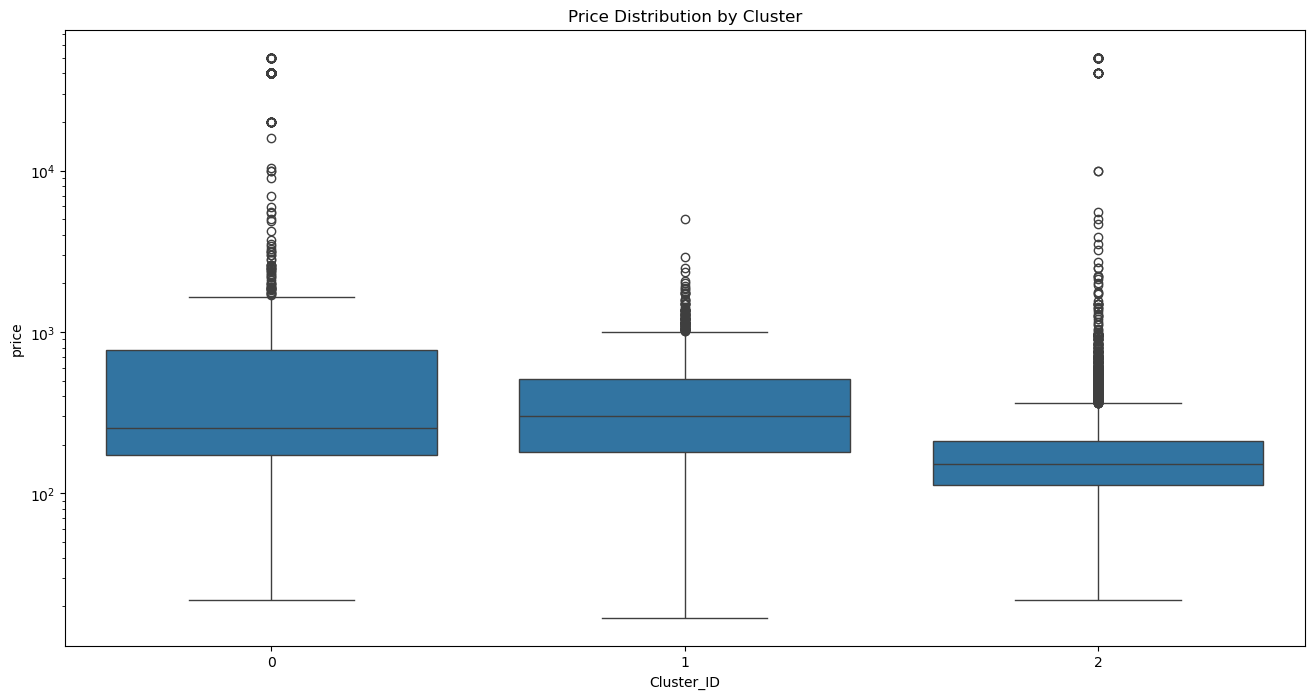

In [14]:
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.boxplot(
    data=df,
    x="Cluster_ID",
    y="price"
)
plt.yscale("log")  # price 有大 outliers，用 log-scale 好看一点
plt.title("Price Distribution by Cluster")
plt.show()


In [15]:
output_cols = df.columns

# 输出结果文件
df.to_csv("listing_honolulu_clustered.csv", index=False)


## PCA 


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


num_cols = [
   

    "latitude",
     "longitude",
     "drive_dist_hnl_km",   # distance to HNL
     "drive_dist_wk_km",    # distance to Waikiki
     #"drive_time_hnl_min",
     #"drive_time_wk_min",
     "review_scores_rating",
     "review_scores_cleanliness",
    # "review_scores_location",
    # "reviews_per_month",
     "accommodates",
     "bedrooms",
     "bathrooms",
]

pca_df = df[num_cols].copy()

scaler_pca = StandardScaler()
X_pca = scaler_pca.fit_transform(pca_df)

pca_full = PCA(random_state=42)
pca_full.fit(X_pca)

explained = pca_full.explained_variance_ratio_
cum_explained = explained.cumsum()

k_85 = int(np.argmax(cum_explained >= 0.85) + 1)
k_90 = int(np.argmax(cum_explained >= 0.90) + 1)
k_95 = int(np.argmax(cum_explained >= 0.95) + 1)

explained_df = pd.DataFrame(
    {
        "component": np.arange(1, len(explained) + 1),
        "explained_variance_ratio": explained,
        "cumulative_variance_ratio": cum_explained,
    }
)
explained_df.head()


,component,explained_variance_ratio,cumulative_variance_ratio
0,1,0.421174,0.421174
1,2,0.254216,0.675389
2,3,0.182155,0.857545
3,4,0.059722,0.917266
4,5,0.042390,0.959657


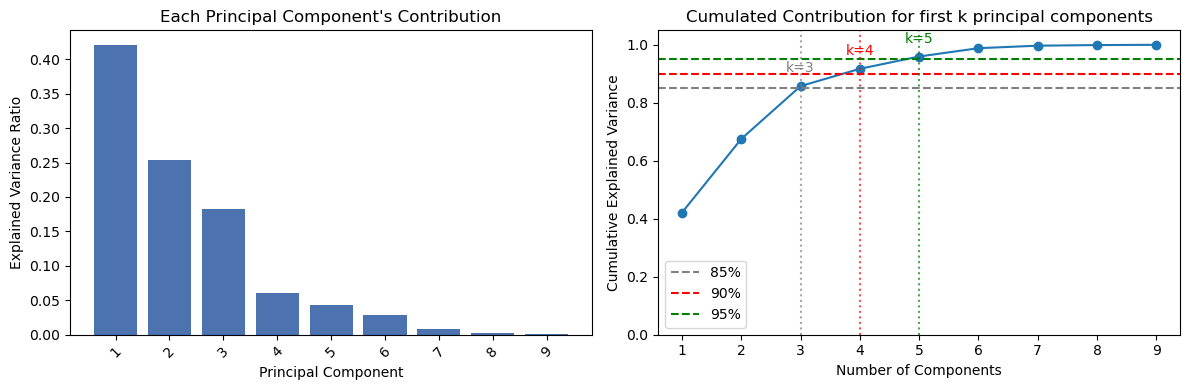

覆盖85%方差的最小主成分数: 3
覆盖90%方差的最小主成分数: 4
覆盖95%方差的最小主成分数: 5


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


axes[0].bar(explained_df["component"], explained_df["explained_variance_ratio"], color="#4c72b0")
axes[0].set_xlabel("Principal Component")
axes[0].set_ylabel("Explained Variance Ratio")
axes[0].set_title("Each Principal Component's Contribution")
axes[0].set_xticks(explained_df["component"])
axes[0].tick_params(axis="x", rotation=45)


axes[1].plot(explained_df["component"], explained_df["cumulative_variance_ratio"], marker="o")
axes[1].axhline(0.85, color="gray", linestyle="--", label="85%")
axes[1].axhline(0.90, color="red", linestyle="--", label="90%")
axes[1].axhline(0.95, color="green", linestyle="--", label="95%")
axes[1].axvline(k_85, color="gray", linestyle=":", alpha=0.7)
axes[1].axvline(k_90, color="red", linestyle=":", alpha=0.7)
axes[1].axvline(k_95, color="green", linestyle=":", alpha=0.7)
axes[1].annotate(f"k={k_85}", (k_85, cum_explained[k_85-1]), textcoords="offset points", xytext=(0,10), ha="center", color="gray")
axes[1].annotate(f"k={k_90}", (k_90, cum_explained[k_90-1]), textcoords="offset points", xytext=(0,10), ha="center", color="red")
axes[1].annotate(f"k={k_95}", (k_95, cum_explained[k_95-1]), textcoords="offset points", xytext=(0,10), ha="center", color="green")
axes[1].set_xlabel("Number of Components")
axes[1].set_ylabel("Cumulative Explained Variance")
axes[1].set_ylim(0, 1.05)
axes[1].set_title("Cumulated Contribution for first k principal components")
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"85% of the total variance: {k_85}")
print(f"90% of the total variance: {k_90}")
print(f"95% of the total variance: {k_95}")


## Use first 4 principles to do hierachical clustering


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


pc_scores = pca_full.transform(X_pca)
X_pca_13 = pc_scores[:, :4]

k_range = range(2, 9)
sil_records = []
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k, linkage="ward")
    labels = model.fit_predict(X_pca_13)
    sil = silhouette_score(X_pca_13, labels)
    sil_records.append({"k": k, "silhouette": sil})

sil_df = pd.DataFrame(sil_records)
sil_df


,k,silhouette
0,2,0.498513
1,3,0.579873
2,4,0.596775
3,5,0.604909
4,6,0.610264
5,7,0.534482
6,8,0.536160


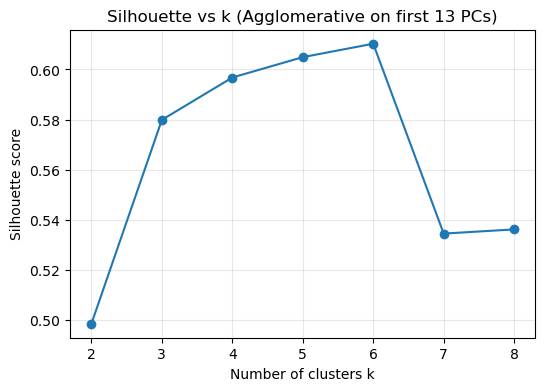

Silhouette 最优 k: 6


Cluster_PCA13
0    5831
1    1233
2     775
3     232
4     407
5     888
Name: count, dtype: int64

In [ ]:

plt.figure(figsize=(6, 4))
plt.plot(sil_df["k"], sil_df["silhouette"], marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k (Agglomerative on first 13 PCs)")
plt.grid(alpha=0.3)
plt.show()

best_k_13 = int(sil_df.sort_values("silhouette", ascending=False).iloc[0]["k"])
print(f"Silhouette best k: {best_k_13}")

final_model_13 = AgglomerativeClustering(n_clusters=best_k_13, linkage="ward")
cluster_labels_13 = final_model_13.fit_predict(X_pca_13)

df["Cluster_PCA13"] = cluster_labels_13
df["Cluster_PCA13"].value_counts().sort_index()


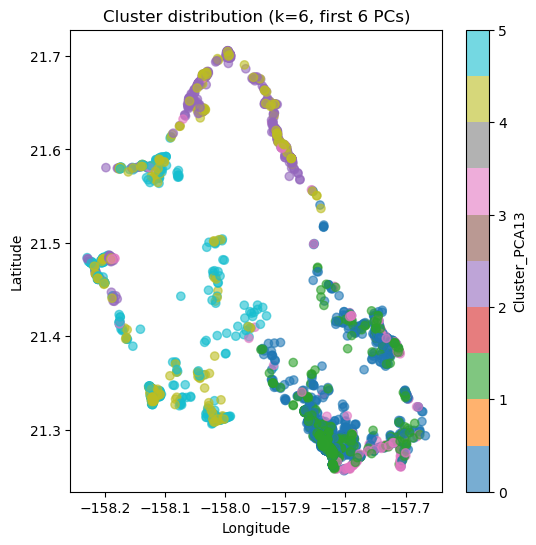

In [ ]:

plt.figure(figsize=(6, 6))
scatter = plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["Cluster_PCA13"],
    alpha=0.6,
    cmap="tab10",
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Cluster distribution (k={best_k_13}, first 6 PCs)")
plt.colorbar(scatter, label="Cluster_PCA13")
plt.show()


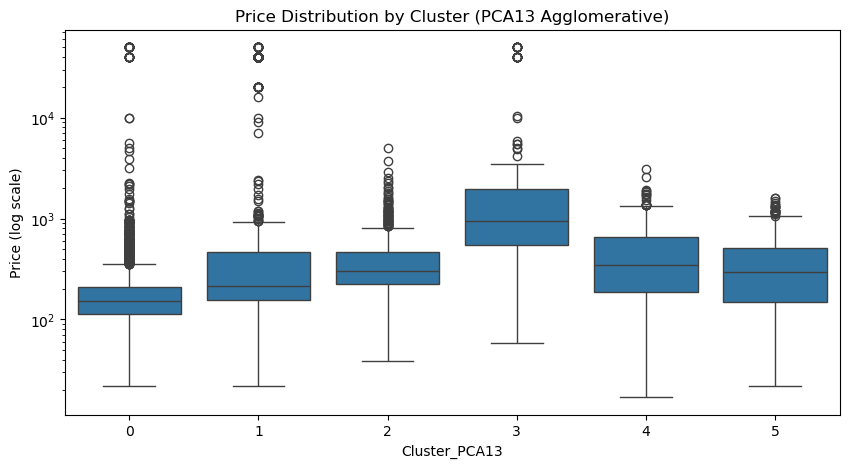

In [ ]:

price_series = pd.to_numeric(df["price"], errors="coerce")

plt.figure(figsize=(10, 5))
sns.boxplot(data=df.assign(price_num=price_series), x="Cluster_PCA13", y="price_num")
plt.yscale("log")
plt.title("Price Distribution by Cluster (PCA13 Agglomerative)")
plt.xlabel("Cluster_PCA13")
plt.ylabel("Price (log scale)")
plt.show()

